In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from numpy import linalg as LA
import pandas as pd
#from load_data_mongoloids import load_data_mongoloids
#from mongoloids_config import config

#from load_data_cancer import load_data_cancer
#from cancer_config import config
import re
import time
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
#import plotly.plotly as py
import textwrap
import scipy.stats as stats

from sklearn import svm, datasets
from scipy import stats
from sklearn import neighbors, ensemble, linear_model, neural_network
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import scipy
from matplotlib.backends.backend_pdf import PdfPages


from infrastructure.configuration import param
import matplotlib.pylab as pylab
import seaborn
seaborn.set_style('darkgrid', {'legend.frameon':True})
fontsize = 20
params = {'legend.fontsize': fontsize,
  'figure.figsize': (18, 15),
  'axes.labelsize': fontsize,
  'axes.titlesize':fontsize,
  'xtick.labelsize':fontsize,
  'ytick.labelsize':fontsize,
  'font.size':fontsize}
pylab.rcParams.update(params)
plt.rc('axes', labelsize=fontsize) 

plt.style.use('ggplot')
%matplotlib inline

import igraph
import cairo

In [2]:
from load_parenclitics import load_parenclitics
from transform_data import parenclitic_feature_names

In [68]:
#from configurations.config_random_graph import config
#parenclitics_rg = load_parenclitics(config, by_sample = True, id_thr = 5, from_mat = True)

from configurations.config_random_graph import config
parenclitics_rg = load_parenclitics(config, by_sample = True, id_thr = 5, from_mat = True)

D:\PC\UNN\Science\Gerontology\data\random_graph\params\num_genes_14756\parenclitics\parenclitic.mat


In [3]:
from configurations.load_data_down_GSE52588 import load_data_down_GSE52588
from configurations.config_down_GSE52588 import config

X, y, mask, genes_names = load_data_down_GSE52588()

D:\PC\UNN\Science\Gerontology\data\GSE52588\GSE52588_average_beta.txt
Data loaded:  1.2071621000000006
float32 (14756, 87)
(87, 14756) 14756


In [3]:
from configurations.load_data_down_GSE52588 import load_data_down_GSE52588_cpgs
from configurations.config_down_GSE52588_cpg import config

X, y, mask, genes_names = load_data_down_GSE52588_cpgs()

Data loaded:  50.8244918
float32 (422801, 87)
(87, 114674)
(87, 114674) 114674 (87,) (114674,)


In [5]:
from load_parenclitics import load_parenclitics
from transform_data import parenclitic_feature_names
parenclitics = load_parenclitics(config, by_sample = True, id_thr = 5, from_mat = True)

D:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_nonhealthy_mask\algorithm_pdf\thr_type_best\division_rule_non_control\parenclitics\parenclitic.mat


In [8]:
from load_parenclitics import load_parenclitics
from transform_data import parenclitic_feature_names

config.params["kde_mask"].value = "mothers_mask"
mask = config.params[config.params["kde_mask"].value].value
parenclitics = load_parenclitics(config, by_sample = True, id_thr = 5, from_mat = True)
print(parenclitics.shape)

config.params["kde_mask"].value = "siblings_mask"
mask = config.params[config.params["kde_mask"].value].value
cur = load_parenclitics(config, by_sample = True, id_thr = 5, from_mat = True)
print(cur.shape)
parenclitics.iloc[mask] = cur.loc[mask]

config.params["kde_mask"].value = "mongoloids_mask"
mask = config.params[config.params["kde_mask"].value].value
cur = load_parenclitics(config, by_sample = True, id_thr = 5, from_mat = True)
print(cur.shape)
parenclitics.iloc[mask] = cur.loc[mask]

print(parenclitics.shape)

D:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_genes_14756\kde_mask_mothers_mask\algorithm_svc\parenclitics\parenclitic.mat
(87, 45)
D:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_genes_14756\kde_mask_siblings_mask\algorithm_svc\parenclitics\parenclitic.mat
(87, 45)
D:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_genes_14756\kde_mask_mongoloids_mask\algorithm_svc\parenclitics\parenclitic.mat


FileNotFoundError: [Errno 2] No such file or directory: 'D:\\PC\\UNN\\Science\\Gerontology\\data\\GSE52588\\params\\num_genes_14756\\kde_mask_mongoloids_mask\\algorithm_svc\\parenclitics\\parenclitic.mat'

In [71]:
try:
    parenclitics_rg
except:
    parenclitics_rg = None
    
if not parenclitics_rg is None:
    cur = parenclitics_rg.loc[0:28] # ShiT! This indexing give closed range 0..28
    parenclitics = parenclitics.append(cur, ignore_index = True, sort=False)
print(parenclitics.shape)

(116, 45)


In [6]:
is_lists = True
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
if is_lists:
    parenclitics = parenclitics.select_dtypes(exclude=numerics) # includ exclude
    parenclitics = parenclitics.drop(columns = ["weights", "component_sizes", "id_components"]) #   "weights" 
    #parenclitics = parenclitics.drop(columns = ["eigenvalues_intervals_normalized", "eigenvalues_intervals", "IPR", "weights", "eigenvalues"])
else:
    parenclitics = parenclitics.select_dtypes(include=numerics) # includ exclude
    #parenclitics = parenclitics.drop(columns = ["mean_pagerank", "max_degrees", "max_closeness"])
    parenclitics = parenclitics.drop(columns = ["min_weights", "max_weights", "mean_weights", "std_weights", "zeros_weights"])
#print parenclitics
#parenclitics = parenclitics[:29]

#parenclitics = parenclitics.drop(columns = ["std_weights", "max_weights", "mean_weights", "mean_pagerank", "mean_closeness", "max_closeness"])


#
print (parenclitics.columns.values, len(parenclitics.columns.values))
parenclitic_names = parenclitic_feature_names()
parenclitic_names = [parenclitic_names[name] for name in parenclitics.columns.values]
#ids = [0,7,11,15,16,17,18]
#parenclitic_names = np.delete(np.array(parenclitic_names), ids)

#parenclitics = parenclitics.drop(columns = parenclitics.columns[ids])

parenclitics.columns = range(len(parenclitics.columns))

['betweenness' 'pagerank' 'closeness' 'eigenvector_centrality' 'degrees'] 5


In [6]:
groups = ["mongoloids_mask", "siblings_mask", "mothers_mask"]
group_masks = [0] * 3
for j, group_name in enumerate(groups):
    group_masks[j] = config.params[group_name].value


In [11]:
import pandas as pd
#"../../../data/Down_phenotype/DOWN_FENOTIPO_No4,8,12_PerCorrelazioni.tsv"
phenotype_df = pd.read_csv(config.ifname("down_phenotypes_table"), delimiter = '\t')

In [17]:
print phenotype_df.shape
mask = (phenotype_df.isnull().sum() == 0)
phenotype_df_good = phenotype_df[mask.index[mask]]
#print phenotype_df_good

from sklearn.impute import SimpleImputer
df = pd.DataFrame(phenotype_df)
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(df)
phenotype_df_imputed = pd.DataFrame(imp.transform(df))
phenotype_df_imputed.columns = phenotype_df.columns

(29, 125)


In [5]:
from sklearn.decomposition import PCA

df = pd.DataFrame(phenotype_df)
df = df.drop(['codicePID'], axis=1)

from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(df)

'''
df = pd.DataFrame(parenclitics)
#print df

df = (df - df.mean()) / df.std()
num_components = 10
pca = PCA(n_components=num_components, svd_solver='full')
pca.fit(df)

columns = ['pca_%i' % i for i in range(num_components)]
df_pca = pd.DataFrame(pca.transform(df), columns=columns, index=df.index)
df_pca
'''

feature_names = ["categoriaDSQIID", "fluenzaverbale","ABCiperattivita", "ABCIrritabilita", "ABCletargia", "ABCstereotipie", "ABCinappropriatespeech", "fluenzafonemica", "F.A.B."]
'''
for feature_name in feature_names:
    plt.figure()
    plt.scatter(df_pca["pca_0"], df_pca["pca_4"], c = phenotype_df[feature_name], cmap= 'jet')
'''

'\nfor feature_name in feature_names:\n    plt.figure()\n    plt.scatter(df_pca["pca_0"], df_pca["pca_4"], c = phenotype_df[feature_name], cmap= \'jet\')\n'

In [40]:
from sklearn import svm, datasets
from scipy import stats
from sklearn import neighbors, ensemble
from sklearn.model_selection import cross_val_score

data = parenclitics
data = data[:29].values
data = stats.zscore(data)
data = data[:, ~np.all(np.isnan(data), axis=0)]

import warnings
warnings.filterwarnings("ignore")

np.set_printoptions(linewidth=100, formatter={'int':lambda x: "{:2d}".format(x), 'float':lambda x: "{:.2f}".format(x)})
feature_names = ["categoriaDSQIID", "fluenzaverbale","ABCiperattivita", "ABCIrritabilita", "ABCletargia", "ABCstereotipie", "ABCinappropriatespeech", "fluenzafonemica", "F.A.B."]
for feature_name in feature_names:
    print (feature_name)
    feature = (phenotype_df[feature_name].values)
    mask = ~np.isnan(feature)
    cur = data[mask]
    feature = feature[mask].astype('int')
    if (feature == 0).sum() < 3:
        continue
    #feature = (feature > np.median(feature)).astype('int')
    
    #print np.nan_to_num(phenotype_df[feature_name].values, -1).astype('int'), 'source'
    print (feature, 'good')
    clfs = [svm.SVC(kernel = 'rbf', C = 1, class_weight = "balanced"), 
            neighbors.KNeighborsClassifier(n_neighbors = 2),
            svm.LinearSVC(C = 1, class_weight = "balanced"),
            ensemble.RandomForestClassifier(n_estimators = 4)]

    for clf in clfs:
        score = cross_val_score(clf, cur, feature, cv=5).mean()
        clf.fit(cur, feature)
        predicted = clf.predict(cur)
        score2 = clf.score(cur, feature)
        val = float(np.bincount(feature).max()) / len(feature)
        print (predicted, "{:.2f}".format(score), "{:.2f}".format(val), "{:.2f}".format(score2), type(clf).__name__)

categoriaDSQIID
[ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  1  0  0  1  0  1  0  1  0  0  1  0  0  0  0] good
[ 1  1  0  1  1  0  0  0  0  1  1  0  0  1  1  1  0  1  0  1  0  1  1  1  1  0  0  0  1] 0.49 0.79 0.66 SVC
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0] 0.80 0.79 0.79 KNeighborsClassifier
[ 1  1  0  1  1  0  0  0  0  0  1  0  0  1  1  1  0  1  0  1  0  1  1  0  1  0  0  0  0] 0.63 0.79 0.76 LinearSVC
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  1  0  0  0  1  0  0  1  0  0  0  0] 0.76 0.79 0.93 RandomForestClassifier
fluenzaverbale
[ 0  1  1  0  1  1  0  0  0  1  0  1  1  2  0  0  1  0  2  0  0  0  0  0  2] good
[ 2  1  1  0  0  1  0  0  0  1  2  2  1  2  0  0  1  2  2  1  0  0  0  0  2] 0.37 0.56 0.76 SVC
[ 0  1  1  0  0  0  0  0  0  0  0  1  0  0  0  0  1  0  0  0  0  0  0  0  1] 0.50 0.56 0.72 KNeighborsClassifier
[ 0  1  1  0  0  1  1  0  0  1  0  0  1  2  0  0  1  2  2  1  0  0  0  0  2] 0.30 0.56 0.80 LinearSVC
[ 0  1  

In [24]:
config.ofname([["parenclitic_pairs_full_inside_all"]], ext = ".pdf", 
                                     include_set = config.params_sets["parenclitic_boxplots"])

'D:\\PC\\UNN\\Science\\Gerontology\\data\\GSE52588\\params\\num_genes_14756\\kde_mask_mongoloids_mask\\algorithm_kde\\thr_p_0.88\\parenclitic_pairs_full_inside_all.pdf'

In [81]:
parenclitic_names[3]

'Eigenvector centrality'

In [8]:
def plot_hist_2d(ax, x, y, bins, c, **kwargs):
    h = ax.hist2d(x, y, bins = bins, cmap = 'jet', norm = matplotlib.colors.LogNorm(), **kwargs)
    plt.colorbar(h[3], ax = ax)

def plot_line(ax, x, y, **kwargs):
    ids = np.argsort(x)
    x, y = x[ids], y[ids]
    ax.plot(x, y, **kwargs)
    
def remove_zeros(x, y):
    eps = 1e-7
    mask = (x > eps) & (y > eps)
    return x[mask], y[mask]

def get_interval(x, y, A, B):
    mask = (x < A) & (y > B)
    return x[mask], y[mask]

def plot_2_2(u, v, u1, v1, u2, v2, u3, v3, u4, v4, parenclitic_names, id1_parenclitic, id2_parenclitic):
    fig, axes = plt.subplots(2, 2, sharey = True, sharex = True, figsize = (13, 11))
    '''
    for i in range(29):
        x = np.reshape(np.array(parenclitics[id1_parenclitic][i]), -1)
        y = np.reshape(np.array(parenclitics[id2_parenclitic][i]), -1)
        plot_line(axes[0, 0], x, y)

        x = np.reshape(np.array(parenclitics[id1_parenclitic][i + 29 * 3]), -1)
        y = np.reshape(np.array(parenclitics[id2_parenclitic][i + 29 * 3]), -1)
        plot_line(axes[0, 1], x, y)

        x = np.reshape(np.array(parenclitics[id1_parenclitic][i + 29 * 1]), -1)
        y = np.reshape(np.array(parenclitics[id2_parenclitic][i + 29 * 1]), -1)
        plot_line(axes[1, 0], x, y)

        x = np.reshape(np.array(parenclitics[id1_parenclitic][i + 29 * 2]), -1)
        y = np.reshape(np.array(parenclitics[id2_parenclitic][i + 29 * 2]), -1)
        plot_line(axes[1, 1], x, y)

    colors = ['red', 'green', 'blue', 'magenta']
    for i in range(4):
        x = np.array(parenclitics[id1_parenclitic][29 * i:29 * i + 29].values.tolist()).mean(axis = 0)
        y = np.array(parenclitics[id2_parenclitic][29 * i:29 * i + 29].values.tolist()).mean(axis = 0)
        plot_line(axes[0, 1], x, y, c = colors[i], linewidth = 3)
    '''
    nbins = 300
    if is_log:
        bins = [np.geomspace(u.min(), u.max(), nbins), np.geomspace(v.min(), v.max(), nbins)]
    else:
        bins = [np.linspace(u.min(), u.max(), nbins), np.linspace(v.min(), v.max(), nbins)]

    '''
    plot_hist_2d(axes[0,0], u2, v2, bins, c = 'red')
    plot_hist_2d(axes[0,1], u4, v4, bins, c = 'magenta')
    plot_hist_2d(axes[1,0], u1, v1, bins, c = 'green')
    plot_hist_2d(axes[1,1], u3, v3, bins, c = 'blue')
    '''

    # Scatter points
    axes[0,0].scatter(u2, v2, c = 'red', rasterized = True, alpha = 0.7)
    axes[0,1].scatter(u4, v4, c = 'magenta', rasterized = True, alpha = 0.7)
    axes[1,0].scatter(u1, v1, c = 'green', rasterized = True, alpha = 0.7)
    axes[1,1].scatter(u3, v3, c = 'blue', rasterized = True, alpha = 0.7)


    #plt.scatter(u, v, c = np.reshape(feature, -1), 
    #            cmap = plt.get_cmap('jet', feature.max() - feature.min() + 1))
    axes[1, 0].set_xlabel(parenclitic_names[id1_parenclitic].capitalize(), fontsize = fontsize)
    axes[1, 0].set_ylabel(parenclitic_names[id2_parenclitic].capitalize(), fontsize = fontsize)

    #plt.subplots_adjust(bottom=0.2, top=0.8, left=0.25, right=0.95, wspace = 0.2)
    plt.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.95, wspace = 0.05)

    plt.setp(axes[0, 1].get_yticklabels(), visible=False)
    plt.setp(axes[1, 1].get_yticklabels(), visible=False)

    '''
    axes[0, 0].set_title('DS')
    axes[0, 1].set_title('Random graph')
    axes[1, 0].set_title('Sibs')
    axes[1, 1].set_title('Moms')
    '''

    axes[0,0].legend(['DS'], framealpha=0.9, fontsize=20, #bbox_to_anchor=(0., 1.02, 1., .102), 
       bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
       ncol=3, mode="expand", borderaxespad=0., handletextpad=0.2, scatterpoints=3, columnspacing = 2)
    axes[0,1].legend(['Random graph'], framealpha=0.9, fontsize=20, #bbox_to_anchor=(0., 1.02, 1., .102), 
       bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
       ncol=3, mode="expand", borderaxespad=0., handletextpad=0.2, scatterpoints=3, columnspacing = 2)
    axes[1,0].legend(['Sibs'], framealpha=0.9, fontsize=20, #bbox_to_anchor=(0., 1.02, 1., .102), 
       bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
       ncol=3, mode="expand", borderaxespad=0., handletextpad=0.2, scatterpoints=3, columnspacing = 2)
    axes[1,1].legend(['Moms'], framealpha=0.9, fontsize=20, #bbox_to_anchor=(0., 1.02, 1., .102), 
       bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
       ncol=3, mode="expand", borderaxespad=0., handletextpad=0.2, scatterpoints=3, columnspacing = 2)


    if is_log:
        for ax in axes.flat:
            ax.set_xscale("log")
            ax.set_yscale("log")
        delta = (np.log(u.max()) - np.log(u.min())) * 0.05
        plt.xlim(np.exp(np.log(u.min()) - delta), np.exp(np.log(u.max()) + delta))

        delta = (np.log(v.max()) - np.log(v.min())) * 0.05
        plt.ylim(np.exp(np.log(v.min()) - delta), np.exp(np.log(v.max()) + delta))
    else:
        axes[0,0].ticklabel_format(scilimits = [-2, 2])
        axes[0,1].ticklabel_format(scilimits = [-2, 2])
        axes[1,0].ticklabel_format(scilimits = [-2, 2])
        axes[1,1].ticklabel_format(scilimits = [-2, 2])
        delta = (u.max() - u.min()) * 0.05
        plt.xlim(u.min() - delta, u.max() + delta)

        delta = (v.max() - v.min()) * 0.05
        plt.ylim(v.min() - delta, v.max() + delta)    
    return fig, axes

def plot_pairs(u, v, u1, v1, u2, v2, u3, v3, u4, v4, parenclitic_names, id1_parenclitic, id2_parenclitic):
    fig = plt.figure(figsize = (9, 7))
    ax = plt.gca()
    nbins = 300
    if is_log:
        bins = [np.geomspace(u.min(), u.max(), nbins), np.geomspace(v.min(), v.max(), nbins)]
    else:
        bins = [np.linspace(u.min(), u.max(), nbins), np.linspace(v.min(), v.max(), nbins)]
    
    ax.scatter(u2, v2, c = 'red', rasterized = True, alpha = 0.5)
    ax.scatter(u1, v1, c = 'green', rasterized = True, alpha = 0.5)
    ax.scatter(u3, v3, c = 'blue', rasterized = True, alpha = 0.5)
    ax.scatter(u4, v4, c = 'magenta', rasterized = True, alpha = 0.5)
    
    ax.set_xlabel(parenclitic_names[id1_parenclitic].capitalize(), fontsize = fontsize)
    ax.set_ylabel(parenclitic_names[id2_parenclitic].capitalize(), fontsize = fontsize)

    plt.subplots_adjust(bottom=0.15, top=0.9, left=0.2, right=0.95, wspace = 0.05)

    ax.legend(['DS', 'Sibs', 'Moms', 'Random graph'], framealpha=0.9, fontsize=20, #bbox_to_anchor=(0., 1.02, 1., .102), 
       bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
       ncol=4, mode="expand", borderaxespad=0., handletextpad=0.2, scatterpoints=3, columnspacing = 1)
    
    if is_log:
        ax.set_xscale("log")
        ax.set_yscale("log")
        delta = (np.log(u.max()) - np.log(u.min())) * 0.05
        plt.xlim(np.exp(np.log(u.min()) - delta), np.exp(np.log(u.max()) + delta))

        delta = (np.log(v.max()) - np.log(v.min())) * 0.05
        plt.ylim(np.exp(np.log(v.min()) - delta), np.exp(np.log(v.max()) + delta))
    else:
        ax.ticklabel_format(scilimits = [-2, 2])
        delta = (u.max() - u.min()) * 0.05
        plt.xlim(u.min() - delta, u.max() + delta)

        delta = (v.max() - v.min()) * 0.05
        plt.ylim(v.min() - delta, v.max() + delta)    
    return fig, ax

from tqdm import tqdm
#"categoriaDSQIID", "fluenzaverbale","ABCiperattivita", "ABCIrritabilita", "ABCletargia", "ABCstereotipie", "ABCinappropriatespeech", "fluenzafonemica", "F.A.B."
data = parenclitics
#data = data[:29]
data = data.values
#data = stats.zscore(data)
feature_name = "ABCinappropriatespeech"
df_ans = None
is_log = False

parenclitic_pairs_path = config.ofname([["parenclitic_pairs_all", "log" if is_log else ""]], 
                                       ext = ".pdf", 
                                       include_set = config.params_sets["parenclitic_boxplots"])
print(parenclitic_pairs_path)
with PdfPages(parenclitic_pairs_path) as pdf:
    for id1_parenclitic in range(data.shape[1]):
        for id2_parenclitic in range(data.shape[1]):
            '''
            parenclitic_pairs_path = config.ofname([["parenclitic_pairs_hist"], 
                                                    ["parenclitic_pairs_all_hist", 
                                                     parenclitic_names[id1_parenclitic], 
                                                     parenclitic_names[id2_parenclitic]]], 
                                                   ext = ".pdf", 
                                                   include_set = config.params_sets["parenclitic_boxplots"])
            print(parenclitic_pairs_path)
            '''
            for id_subject in [0]: # tqdm(range(29))
                if id1_parenclitic == id2_parenclitic: 
                    continue
                id_parenclitic = [id1_parenclitic, id2_parenclitic]
                print (parenclitic_names[id1_parenclitic], parenclitic_names[id2_parenclitic])
                #cur = data[:, id_parenclitic]
                #val = np.arctan2(cur[:, 0] - cur[0, 0], cur[:, 1] - cur[0, 1]) % np.pi
                #print val[val != 0] #(cur[:, 0] - cur[0, 0].min()) / (cur[:, 1] - cur[:, 1].min())
                #if np.std(val[val != 0]) < 1e-3:
                #    continue

                #cur = cur[:29]

                #feature = np.reshape(y == 0, -1)

                #u = np.reshape(np.array(parenclitics[id1_parenclitic][29:58]).tolist(), -1)
                #v = np.reshape(np.array(parenclitics[id2_parenclitic][29:58]).tolist(), -1)
                #print(u.shape, u.dtype)

                #plt.figure(figsize = (7, 5))
                #plt.figure()
                num = 29
                u4 = np.reshape(np.array(parenclitics[id1_parenclitic][29 * 3 + id_subject:29 * 3 + num + id_subject]).tolist(), -1)
                v4 = np.reshape(np.array(parenclitics[id2_parenclitic][29 * 3 + id_subject:29 * 3 + num + id_subject]).tolist(), -1)

                u3 = np.reshape(np.array(parenclitics[id1_parenclitic][29 * 2 + id_subject:29 * 2 + num + id_subject]).tolist(), -1)
                v3 = np.reshape(np.array(parenclitics[id2_parenclitic][29 * 2 + id_subject:29 * 2 + num + id_subject]).tolist(), -1)

                u2 = np.reshape(np.array(parenclitics[id1_parenclitic][29 * 0 + id_subject:29 * 0 + num + id_subject]).tolist(), -1)
                v2 = np.reshape(np.array(parenclitics[id2_parenclitic][29 * 0 + id_subject:29 * 0 + num + id_subject]).tolist(), -1)

                u1 = np.reshape(np.array(parenclitics[id1_parenclitic][29 * 1 + id_subject:29 * 1 + num + id_subject]).tolist(), -1)
                v1 = np.reshape(np.array(parenclitics[id2_parenclitic][29 * 1 + id_subject:29 * 1 + num + id_subject]).tolist(), -1)

                #u1, v1 = remove_zeros(u1, v1)
                #u2, v2 = remove_zeros(u2, v2)
                #u3, v3 = remove_zeros(u3, v3)
                #u4, v4 = remove_zeros(u4, v4)

                #u = np.concatenate([u1, u2, u3, u4])
                #v = np.concatenate([v1, v2, v3, v4])

                u = np.reshape(np.array(parenclitics[id1_parenclitic][:]).tolist(), -1)
                v = np.reshape(np.array(parenclitics[id2_parenclitic][:]).tolist(), -1)
                print(u.shape)
                #u, v = remove_zeros(u, v)
                

                #if np.ptp(u) < 1e-8 or np.ptp(v) < 1e-8:
                #    continue

                colors = np.zeros_like(u)
                colors[-len(u2)-len(u3):] = 1
                colors[-len(u3):] = 2


                #fig, axes = plot_2_2(u, v, u1, v1, u2, v2, u3, v3, u4, v4, parenclitic_names, id1_parenclitic, id2_parenclitic)
                fig, ax = plot_pairs(u, v, u1, v1, u2, v2, u3, v3, u4, v4, parenclitic_names, id1_parenclitic, id2_parenclitic)

                
                #plt.title(feature_name, fontsize = fontsize)
                #plt.colorbar()
                pdf.savefig(dpi = 300)
                #parenclitic_pairs_path = config.ofname([["parenclitic_pairs_full_inside_down"], [parenclitic_names[id1_parenclitic], parenclitic_names[id2_parenclitic]]], ext = ".png", 
                #                         include_set = config.params_sets["parenclitic_boxplots"])
                #plt.savefig(parenclitic_pairs_path)
                #plt.show()
                plt.close()
                #sdf

                continue


                feature = (phenotype_df[feature_name].values)
                feature = feature[:29]

                mask = ~np.isnan(feature)
                #cur = cur[mask]
                u = u[mask]
                v = v[mask]
                cur = cur[mask]
                #cur = cur.reshape(-1, 1)
                feature = feature[mask].astype('int')
                feature = np.minimum(feature, 12)
                #if (feature == 0).sum() < 3:
                #    continue
                #feature = (feature > np.median(feature)).astype('int')

                #print np.nan_to_num(phenotype_df[feature_name].values, -1).astype('int'), 'source'
                #print feature, 'good'
                clfs = [svm.SVC(kernel = 'rbf', C = 1, class_weight = "balanced"), 
                        neighbors.KNeighborsClassifier(n_neighbors = 2),
                        svm.LinearSVC(C = 1, class_weight = "balanced"),
                        ensemble.RandomForestClassifier(n_estimators = 4)]
                df_cur = pd.DataFrame(index=[0])

                #df_ans[parenclitic_names[id_parenclitic]] = parenclitics[id_parenclitic]
                #df_ans["input"] = cur
                #df_ans["good"] = feature
                #'''

                #plt.scatter(np.reshape(parenclitics[id_parenclitic], -1), np.reshape(np.zeros_like(cur), -1), c = np.reshape(feature, -1), cmap = 'jet')
                #'''
                df_cur['parenclitic_1'] = parenclitic_names[id1_parenclitic]
                df_cur['parenclitic_2'] = parenclitic_names[id2_parenclitic]
                for clf in clfs:
                    score = cross_val_score(clf, cur, feature, cv=5, scoring = "neg_mean_absolute_error")

                    clf.fit(cur, feature)
                    predicted = clf.predict(cur)
                    score2 = np.mean(np.abs(feature - np.around(predicted).astype("int")))
                    score_median = np.mean(np.abs(feature - np.median(feature)))
                    clf_name = type(clf).__name__
                    df_cur[clf_name + '_score_cv'] = -score.mean()
                    df_cur[clf_name + '_score_best'] = score2
                    #print np.around(predicted).astype("int"), "{:.2f}".format(-score.mean()), "{:.2f}".format(score_median), "{:.2f}".format(score2), clf_name

                    '''
                    score = cross_val_score(clf, cur, feature, cv=5).mean()
                    clf.fit(cur, feature)
                    predicted = clf.predict(cur)
                    score2 = clf.score(cur, feature)
                    val = float(max((feature == 0).sum(), (feature == 1).sum())) / len(feature)
                    clf_name = type(clf).__name__
                    #df_ans[clf_name] = predicted
                    print predicted, "{:.2f}".format(score), "{:.2f}".format(val), "{:.2f}".format(score2), clf_name
                    '''
                if df_ans is None:
                    df_ans = df_cur
                else:
                    df_ans = df_ans.append (df_cur, ignore_index=True)
                #plt.show()
                pd.set_option('display.width', 100)
                #print df_ans
            #break

D:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_cpgs_114674\kde_mask_nonhealthy_mask\algorithm_pdf\thr_type_best\division_rule_non_control\parenclitic_pairs_all_.pdf
Betweenness Pagerank
(9976638,)
Betweenness Closeness
(9976638,)
Betweenness Eigenvector centrality
(9976638,)
Betweenness Degrees
(9976638,)
Pagerank Betweenness
(9976638,)
Pagerank Closeness
(9976638,)
Pagerank Eigenvector centrality
(9976638,)
Pagerank Degrees
(9976638,)
Closeness Betweenness
(9976638,)
Closeness Pagerank
(9976638,)
Closeness Eigenvector centrality
(9976638,)
Closeness Degrees
(9976638,)
Eigenvector centrality Betweenness
(9976638,)
Eigenvector centrality Pagerank
(9976638,)
Eigenvector centrality Closeness
(9976638,)
Eigenvector centrality Degrees
(9976638,)
Degrees Betweenness
(9976638,)
Degrees Pagerank
(9976638,)
Degrees Closeness
(9976638,)
Degrees Eigenvector centrality
(9976638,)


In [22]:
data.shape[1]

5

In [17]:
print(u.min(), u.max())
#bins = np.linspace(u.min, u.max(), nbins)

0.00010349824052991099 91879242.73962077


(116, 5)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]
[29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
[58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81
 82 83 84 85 86]


(array([4., 4., 3., 3., 4., 3., 3., 0., 3., 2.]),
 array([1049. , 1594.6, 2140.2, 2685.8, 3231.4, 3777. , 4322.6, 4868.2,
        5413.8, 5959.4, 6505. ]),
 <a list of 1 Patch objects>)

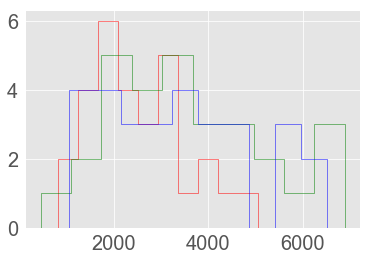

In [173]:
def get_interval(x, y, A, B):
    mask = (x < A) & (y > B)
    return x[mask], y[mask]

print(parenclitics.shape)
data = []
for cur_mask in group_masks:
    print(cur_mask)
    u = parenclitics[1][cur_mask].values
    v = parenclitics[3][cur_mask].values
    A = 2e-5
    B = 5e-5
    for i in range(len(u)):
        x, y = u[i], v[i]
        #print(len(x))
        #print(x.ptp())
        x, y = get_interval(x, y, A, B)
        #print(len(x))
        #plt.figure()
        #print(x.min(), x.max(), x.ptp())
        #plt.hist(y, bins = 100)
        data.append(len(x))

#print(data)
data = np.array(data)
plt.hist(data[:29], color = 'r', histtype = 'step')
plt.hist(data[29:29 * 2], color = 'g', histtype = 'step')
plt.hist(data[29 * 2:29 * 3], color = 'b', histtype = 'step')

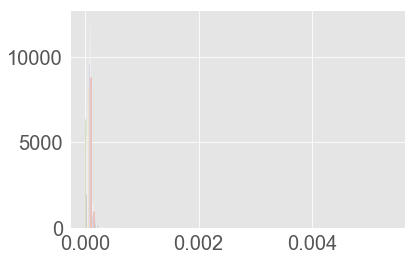

In [145]:
u = parenclitics[1][cur_mask].values
v = parenclitics[3][cur_mask].values
x, y = get_interval(x, y, A, B)
plt.hist(v, 100)
print('')

# --------------------------------------------------------------------------------------------------------------

In [7]:
#"categoriaDSQIID", "fluenzaverbale","ABCiperattivita", "ABCIrritabilita", "ABCletargia", "ABCstereotipie", "ABCinappropriatespeech", "fluenzafonemica", "F.A.B."
data = parenclitics
#data = data[:29]
data = data.values
#data = stats.zscore(data)
from matplotlib.backends.backend_pdf import PdfPages
feature_name = "categoriaDSQIID"
df_ans = None
#parenclitic_pairs_path = config.ofname([["parenclitic_pairs"]], ext = ".pdf", 
#                                     include_set = config.params_sets["parenclitic_boxplots"])
    
#with PdfPages(parenclitic_pairs_path) as pdf:
#with 1 as pdf:
for id1_parenclitic in range(data.shape[1]):
    for id2_parenclitic in range(data.shape[1]):
        if id1_parenclitic == id2_parenclitic: 
            continue
        id_parenclitic = [id1_parenclitic, id2_parenclitic]
        print (parenclitic_names[id1_parenclitic], parenclitic_names[id2_parenclitic])
        #cur = data[:, id_parenclitic]
        #val = np.arctan2(cur[:, 0] - cur[0, 0], cur[:, 1] - cur[0, 1]) % np.pi
        #print val[val != 0] #(cur[:, 0] - cur[0, 0].min()) / (cur[:, 1] - cur[:, 1].min())
        #if np.std(val[val != 0]) < 1e-3:
        #    continue

        #cur = cur[:29]

        #feature = np.reshape(y == 0, -1)

        #u = np.reshape(np.array(parenclitics[id1_parenclitic][29:58]).tolist(), -1)
        #v = np.reshape(np.array(parenclitics[id2_parenclitic][29:58]).tolist(), -1)
        #print(u.shape, u.dtype)

        plt.figure(figsize = (7, 5))
        plt.figure()
        
        mask = ~np.isnan(feature)
        
        num = len(parenclitics[id1_parenclitic][0])
        print(num)
        
        u = np.reshape(np.array(parenclitics[id1_parenclitic][mask]).tolist(), -1)
        v = np.reshape(np.array(parenclitics[id2_parenclitic][mask]).tolist(), -1)

        feature = (phenotype_df[feature_name].values)
        feature = feature[:29]
        feature = feature[mask].astype('int')        
        
        colors = np.zeros_like(u)
        colors[-len(u2):] = 1

        #plt.scatter(u, v, c = colors, rasterized = True, alpha = 0.1, cmap = plt.get_cmap('jet', 2))

        plt.scatter(u, v, c = np.reshape(np.tile(feature, (num, 1)), -1), 
                    cmap = plt.get_cmap('jet', feature.max() - feature.min() + 1))
        plt.xlabel(parenclitic_names[id1_parenclitic].capitalize(), fontsize = fontsize)
        plt.ylabel(parenclitic_names[id2_parenclitic].capitalize(), fontsize = fontsize)
        delta = (u.max() - u.min()) * 0.05
        plt.xlim(u.min() - delta, u.max() + delta)

        delta = (v.max() - v.min()) * 0.05
        plt.ylim(v.min() - delta, v.max() + delta)
        plt.subplots_adjust(bottom=0.2, top=0.9, left=0.25, right=0.95)
        #plt.yscale('log')

        #plt.title(feature_name, fontsize = fontsize)
        #plt.colorbar()
        #pdf.savefig(dpi = 300)
        parenclitic_pairs_path = config.ofname([["parenclitic_pairs_full"], [parenclitic_names[id1_parenclitic], parenclitic_names[id2_parenclitic]]], ext = ".png", 
                                 include_set = config.params_sets["parenclitic_boxplots"])
        plt.savefig(parenclitic_pairs_path)
        #plt.show()
        plt.close()
        #sdf
        continue


        feature = np.minimum(feature, 12)
        #if (feature == 0).sum() < 3:
        #    continue
        #feature = (feature > np.median(feature)).astype('int')

        #print np.nan_to_num(phenotype_df[feature_name].values, -1).astype('int'), 'source'
        #print feature, 'good'
        clfs = [svm.SVC(kernel = 'rbf', C = 1, class_weight = "balanced"), 
                neighbors.KNeighborsClassifier(n_neighbors = 2),
                svm.LinearSVC(C = 1, class_weight = "balanced"),
                ensemble.RandomForestClassifier(n_estimators = 4)]
        df_cur = pd.DataFrame(index=[0])

        #df_ans[parenclitic_names[id_parenclitic]] = parenclitics[id_parenclitic]
        #df_ans["input"] = cur
        #df_ans["good"] = feature
        #'''

        #plt.scatter(np.reshape(parenclitics[id_parenclitic], -1), np.reshape(np.zeros_like(cur), -1), c = np.reshape(feature, -1), cmap = 'jet')
        #'''
        df_cur['parenclitic_1'] = parenclitic_names[id1_parenclitic]
        df_cur['parenclitic_2'] = parenclitic_names[id2_parenclitic]
        for clf in clfs:
            score = cross_val_score(clf, cur, feature, cv=5, scoring = "neg_mean_absolute_error")

            clf.fit(cur, feature)
            predicted = clf.predict(cur)
            score2 = np.mean(np.abs(feature - np.around(predicted).astype("int")))
            score_median = np.mean(np.abs(feature - np.median(feature)))
            clf_name = type(clf).__name__
            df_cur[clf_name + '_score_cv'] = -score.mean()
            df_cur[clf_name + '_score_best'] = score2
            #print np.around(predicted).astype("int"), "{:.2f}".format(-score.mean()), "{:.2f}".format(score_median), "{:.2f}".format(score2), clf_name

            '''
            score = cross_val_score(clf, cur, feature, cv=5).mean()
            clf.fit(cur, feature)
            predicted = clf.predict(cur)
            score2 = clf.score(cur, feature)
            val = float(max((feature == 0).sum(), (feature == 1).sum())) / len(feature)
            clf_name = type(clf).__name__
            #df_ans[clf_name] = predicted
            print predicted, "{:.2f}".format(score), "{:.2f}".format(val), "{:.2f}".format(score2), clf_name
            '''
        if df_ans is None:
            df_ans = df_cur
        else:
            df_ans = df_ans.append (df_cur, ignore_index=True)
        #plt.show()
        pd.set_option('display.width', 100)
        #print df_ans
    #break

Betweenness Pagerank


NameError: name 'feature' is not defined

<Figure size 504x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [42]:
parenclitic_pairs_path

'D:\\PC\\UNN\\Science\\Gerontology\\data\\GSE52588\\params\\num_genes_14756\\kde_mask_mongoloids_mask\\algorithm_kde\\parenclitic_pairs\\Robustness_Max component size norm edges.png'

In [36]:
#data = parenclitics.drop(columns = [0,7,11,15,16,17,18])
import warnings
warnings.filterwarnings("ignore")

#data = parenclitics
#data = data[:29].values
data = np.array(X)
data = data[:29]
data = stats.zscore(data)
data = data[:, ~np.all(np.isnan(data), axis=0)]

feature_names = ["ABCiperattivita", "ABCIrritabilita", "ABCletargia", "ABCstereotipie", "ABCinappropriatespeech", "qiv", "qip", "token", "fluenzafonemica", "F.A.B."]
np.set_printoptions(linewidth=100, formatter={'int':lambda x: "{:2d}".format(x), 'float':lambda x: "{:.2f}".format(x)})
for feature_name in feature_names:
    print (feature_name)
    feature = (phenotype_df[feature_name].values)
    
    cur = data[~np.isnan(feature)]
    feature = feature[~np.isnan(feature)].astype('int')
    #print np.nan_to_num(phenotype_df[feature_name].values, 9).astype('int'), 'source'
    print (feature, 'input', 'std =', "{:.2f}".format(np.std(feature)), 'iqr =', "{:.2f}".format(scipy.stats.iqr(feature, rng=(5, 95)) / 2))
    clfs = [svm.LinearSVR(), 
            neighbors.KNeighborsRegressor(n_neighbors = 2),
            linear_model.LinearRegression(),
            ensemble.RandomForestRegressor(n_estimators = 4),
            #neural_network.MLPRegressor(max_iter = 50, hidden_layer_sizes = (100, ))
            ]

    for clf in clfs:
        score = cross_val_score(clf, cur, feature, cv=20, scoring = "neg_mean_absolute_error")
        
        clf.fit(cur, feature)
        predicted = clf.predict(cur)
        score2 = np.mean(np.abs(feature - np.around(predicted).astype("int")))
        score_median = np.mean(np.abs(feature - np.median(feature)))
        print (np.around(predicted).astype("int"), "{:.2f}".format(-score.mean()), "{:.2f}".format(score_median), "{:.2f}".format(score2), type(clf).__name__)
        #print score

ABCiperattivita
[ 5  0 12  1  0  0  3  2  9  1  0  3 43  2  2  2  0  2  0  0  1  1  0  0  2  0  0  2] input std = 8.11 iqr = 5.47
[ 5  0 12  1  0  0  3  2  9  1  0  3 43  2  2  2  0  2  0  0  1  1  0  0  2  0  0  2] 39.02 3.11 0.00 LinearSVR
[ 2  1  6  2  0  0  6  1  6  2  2  2 22  2  1  2  1  2  0  0  0  0  0  1  2  0  1  2] 2.46 3.11 1.75 KNeighborsRegressor
[ 5  0 12  1  0  0  3  2  9  1  0  3 43  2  2  2  0  2  0  0  1  1  0  0  2  0  0  2] 4.41 3.11 0.00 LinearRegression
[ 4  1  3  3  0  0  4  2  9  1  0  2 32 12  2  2  1  0  0  0  1  1  0  0  1  0  0  2] 4.61 3.11 1.43 RandomForestRegressor
ABCIrritabilita
[ 0  1  5  2  0  0  0  3  0  0  0  1  8 16  0  0  0  0  0  1  6  3  4  0  0  0  0  3] input std = 3.44 iqr = 3.65
[ 0  1  5  2  0  0  0  3  0  0  0  1  8 16  0  0  0  0  0  1  6  3  4  0  0  0  0  3] 22.99 1.89 0.00 LinearSVR
[ 0  0  4  1  0  0  0  2  0  0  0  0  4 11  0  0  0  0  0  0  3  2  2  0  0  3  0  2] 1.96 1.89 0.89 KNeighborsRegressor
[ 0  1  5  2  0  0  0  3  0  0  0

In [235]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
import scipy.stats as stats

def calc_anova_f_oneway(data, y):
    num_groups = 5
    bins = np.array(np.percentile(data, np.linspace(0, 100, num_groups + 1)))
    classes = np.minimum(np.digitize(data, bins), num_groups) - 1
    classes = classes.flatten()
    res = np.array(y)
    for c in range(5):
        res[classes == c] = y[classes == c].mean()
    model = stats.f_oneway(y[classes == 0], y[classes == 1], y[classes == 2], y[classes == 3], y[classes == 4])
    return model.pvalue, res

def input_feature_assessment_regr(cur, feature, clf):
    if type(clf) is str:
        if clf == "anova_f_oneway":
            return calc_anova_f_oneway(cur, feature)

        if clf == "anova_ols":
            cur = sm.add_constant(cur)
            model = sm.OLS(feature, cur).fit()
            return model.pvalues[1], model.predict(cur)
    #score = cross_val_score(clf, cur, feature, cv=20, scoring = "neg_mean_absolute_error")
    
    clf.fit(cur, feature)
    predicted = clf.predict(cur)
    score2 = np.mean(np.abs(feature - np.around(predicted).astype("int")))
    #score_median = np.mean(np.abs(feature - np.median(feature)))
    return score2, predicted

def input_feature_assessment_classifier(cur, feature, clf):
    #score = cross_val_score(clf, cur, feature, cv=20, scoring = "neg_mean_absolute_error")
    
    clf.fit(cur, feature)
    predicted = clf.predict(cur)
    score = clf.score(cur, feature)
    #score_median = np.mean(np.abs(feature - np.median(feature)))
    return score


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    delta_x = (x.max() - x.min()) * 0.1
    delta_y = (y.max() - y.min()) * 0.1
    x_min, x_max = x.min() - delta_x, x.max() + delta_x
    y_min, y_max = y.min() - delta_y, y.max() + delta_y
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


In [28]:
#feature_names = phenotype_df.columns.values
np.array(feature_names)
phenotype_df.columns.values
import re
re.sub("[^\d^\w^\.]", "_", "sdf.s45+$<")

'sdf.s45___'

In [250]:
#data = parenclitics.drop(columns = [0,7,11,15,16,17,18])
import warnings
from tqdm import tqdm

warnings.filterwarnings("ignore")

#data = parenclitics
#data = data[:29].values
XX = np.random.rand(X.shape[0], 100000)
data = np.array(XX)
#data = data[:, :100]
data_full = stats.zscore(data)
data = data_full[config.params["mongoloids_mask"].value]
print data.shape

# Regression
feature_names = ["fluenzaverbale", "ABCletargia", "ABCstereotipie", "ABCinappropriatespeech", "qiv", "qip", "token", "fluenzafonemica", "F.A.B.", "ABCiperattivita", "ABCIrritabilita", "DSQIID"]
#feature_names = phenotype_df.columns.values
clfs = ["anova_ols",
        "anova_f_oneway",
        linear_model.LinearRegression(),
        svm.SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1),
        #svm.SVR(kernel='poly', C=100, degree=3, epsilon=.1, coef0=1),
        svm.LinearSVR(),
        neighbors.KNeighborsRegressor(n_neighbors = 3),
        #ensemble.RandomForestRegressor(n_estimators = 4),
        #neural_network.MLPRegressor(max_iter = 50, hidden_layer_sizes = (10, ))
        ]
#clfs = [linear_model.LinearRegression()]
# Classifiers
'''
feature_names = ["categoriaDSQIID", "fluenzaverbale","ABCiperattivita", "ABCIrritabilita", "ABCletargia", "ABCstereotipie", "ABCinappropriatespeech", "fluenzafonemica", "F.A.B."]
clfs = [svm.SVC(kernel = 'rbf', C = 1, class_weight = "balanced"), 
        neighbors.KNeighborsClassifier(n_neighbors = 3),
        svm.LinearSVC(C = 1, class_weight = "balanced"),
        ensemble.RandomForestClassifier(n_estimators = 4),
        neural_network.MLPClassifier(max_iter = 50, hidden_layer_sizes = (100, ))
       ]
'''
is_normalized = False
is_fit = True
if not is_normalized:
    data_full = np.array(XX)
    norm_str = ""
else:
    norm_str = "_norm"

if is_fit:
    fit_str = "_fit"
else:
    fit_str = ""
    
np.set_printoptions(linewidth=100, formatter={'int':lambda x: "{:2d}".format(x), 'float':lambda x: "{:.2f}".format(x)})
for feature_name in feature_names:
    print feature_name
    feature = (phenotype_df[feature_name].values)
    feature_mask = ~np.isnan(feature)
    cur = data[feature_mask]
    feature = feature[~np.isnan(feature)].astype('int')
    #print np.nan_to_num(phenotype_df[feature_name].values, 9).astype('int'), 'source'
    #print feature, 'input', 'std =', "{:.2f}".format(np.std(feature)), 'iqr =', "{:.2f}".format(scipy.stats.iqr(feature, rng=(5, 95)) / 2)
    model_names = []
    fig, axes = plt.subplots(3, len(clfs), figsize = (len(clfs) * 5, 15))
    fig.subplots_adjust(wspace=0.2, hspace=0.5)
    fig.subplots_adjust(bottom=0.1, top=0.9, left=0.05, right=0.95)
    for i, clf in enumerate(clfs):
        scores = np.zeros((data.shape[1], ))
        if type(clf) is str:
            model_name = clf
        else:
            model_name = type(clf).__name__
        print model_name
        model_names.append(model_name)        

        for j in tqdm(range(data.shape[1])):
            scores[j], _ = input_feature_assessment_regr(cur[:, j].reshape(-1, 1), feature, clf)
            
        ids = np.argsort(scores) #[::-1]
        #subset_scores = np.zeros((data.shape[0], ))
        #print scores[ids[:len(subset_scores)]]
        #for j in range(len(subset_scores)):
        #    subset_scores[j], _ = input_feature_assessment_regr(cur[:, ids[:j + 1]], feature, clf)
        #print subset_scores
        #plt.plot(range(len(subset_scores)), subset_scores)
        lines = [0] * 3
        for j in range(3):
            tid = ids[j]
            ax = axes[j, i]
            u, v = cur[:, tid], feature
            
            score, p = input_feature_assessment_regr(u.reshape(-1, 1), feature, clf)
            u, v, p = u.flatten(), v.flatten(), p.flatten()
            
            #xx, yy = make_meshgrid(u, v)
            #plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
            title_name = (model_name + '\n' if j == 0 else '') + ' score = ' + "{:0.2g}".format(score)
            plot_cpg_per_phenotype(data_full, v, p, tid, feature_mask, is_fit = is_fit, title_name = title_name)
    #plt.show()
    #break
    
    fig.suptitle(feature_name, fontsize = 2 * fontsize)
    fig.legend(lines, ['Down', 'Siblings', 'Mothers'], framealpha=0.9, fontsize=30, #bbox_to_anchor=(0., 1.02, 1., .102), 
               loc=3,
           ncol=3, mode="expand", borderaxespad=0., handletextpad=0.3, scatterpoints=3)
    
    #plot_url = py.plot_mpl(fig)
    
    feature_name = re.sub("[^\d^\w^\.]", "_", feature_name)
    regressions_path = config.ofname([["down_phenotypes"], ["regressions" + fit_str + norm_str + "_rand"], [feature_name]], ext = ".pdf", 
                                     include_set = config.params_sets["down_phenotypes"])
    print regressions_path
    plt.savefig(regressions_path)
    
    regressions_path = config.ofname([["down_phenotypes"], ["regressions" + fit_str + norm_str + "_rand"], [feature_name]], ext = ".png", 
                                     include_set = config.params_sets["down_phenotypes"])
    plt.savefig(regressions_path)
    
    regressions_path = config.ofname([["down_phenotypes"], ["regressions" + fit_str + norm_str + "_rand"], [feature_name]], ext = ".svg", 
                                     include_set = config.params_sets["down_phenotypes"])
    plt.savefig(regressions_path)
    
    plt.close(fig)
    #break
    #break
    #val = float(np.bincount(feature).max()) / len(feature)
    #val = np.mean(np.abs(feature - np.median(feature)))
    #plt.plot([0, len(subset_scores)], [val, val])
        
        #break
    #plt.legend(model_names)
    #plt.show()
    #break

(29L, 100000L)
fluenzaverbale
anova_ols


100%|██████████| 100000/100000 [01:06<00:00, 1501.95it/s]


anova_f_oneway


100%|██████████| 100000/100000 [00:44<00:00, 2229.95it/s]


LinearRegression


100%|██████████| 100000/100000 [00:49<00:00, 2034.63it/s]


SVR


100%|██████████| 100000/100000 [00:46<00:00, 2152.02it/s]


LinearSVR


100%|██████████| 100000/100000 [00:30<00:00, 3279.76it/s]


KNeighborsRegressor


100%|██████████| 100000/100000 [01:22<00:00, 1207.80it/s]


F:\PC\UNN\Scientific\Gerontology\data\GSE52588\params\num_cpgs_142987\down_phenotypes\regressions_fit_rand\fluenzaverbale.pdf
ABCletargia
anova_ols


100%|██████████| 100000/100000 [01:03<00:00, 1580.95it/s]


anova_f_oneway


100%|██████████| 100000/100000 [00:44<00:00, 2262.39it/s]


LinearRegression


100%|██████████| 100000/100000 [00:49<00:00, 2028.56it/s]


SVR


100%|██████████| 100000/100000 [00:40<00:00, 2497.19it/s]


LinearSVR


100%|██████████| 100000/100000 [00:29<00:00, 3433.36it/s]


KNeighborsRegressor


100%|██████████| 100000/100000 [01:20<00:00, 1243.94it/s]


F:\PC\UNN\Scientific\Gerontology\data\GSE52588\params\num_cpgs_142987\down_phenotypes\regressions_fit_rand\ABCletargia.pdf
ABCstereotipie
anova_ols


100%|██████████| 100000/100000 [01:02<00:00, 1599.82it/s]


anova_f_oneway


100%|██████████| 100000/100000 [00:44<00:00, 2257.34it/s]


LinearRegression


100%|██████████| 100000/100000 [00:49<00:00, 2035.33it/s]


SVR


100%|██████████| 100000/100000 [00:42<00:00, 2369.44it/s]


LinearSVR


100%|██████████| 100000/100000 [00:29<00:00, 3362.25it/s]


KNeighborsRegressor


100%|██████████| 100000/100000 [01:21<00:00, 1231.10it/s]


F:\PC\UNN\Scientific\Gerontology\data\GSE52588\params\num_cpgs_142987\down_phenotypes\regressions_fit_rand\ABCstereotipie.pdf
ABCinappropriatespeech
anova_ols


100%|██████████| 100000/100000 [01:02<00:00, 1601.31it/s]


anova_f_oneway


100%|██████████| 100000/100000 [00:44<00:00, 2269.22it/s]


LinearRegression


100%|██████████| 100000/100000 [00:49<00:00, 2035.21it/s]


SVR


100%|██████████| 100000/100000 [00:42<00:00, 2342.80it/s]


LinearSVR


100%|██████████| 100000/100000 [00:29<00:00, 3405.41it/s]


KNeighborsRegressor


100%|██████████| 100000/100000 [01:20<00:00, 1246.99it/s]


F:\PC\UNN\Scientific\Gerontology\data\GSE52588\params\num_cpgs_142987\down_phenotypes\regressions_fit_rand\ABCinappropriatespeech.pdf
qiv
anova_ols


100%|██████████| 100000/100000 [01:02<00:00, 1597.50it/s]


anova_f_oneway


100%|██████████| 100000/100000 [00:44<00:00, 2265.01it/s]


LinearRegression


100%|██████████| 100000/100000 [00:48<00:00, 2042.07it/s]


SVR


100%|██████████| 100000/100000 [00:39<00:00, 2556.30it/s]


LinearSVR


100%|██████████| 100000/100000 [00:28<00:00, 3550.63it/s]


KNeighborsRegressor


100%|██████████| 100000/100000 [01:20<00:00, 1238.10it/s]


F:\PC\UNN\Scientific\Gerontology\data\GSE52588\params\num_cpgs_142987\down_phenotypes\regressions_fit_rand\qiv.pdf
qip
anova_ols


100%|██████████| 100000/100000 [01:02<00:00, 1607.72it/s]


anova_f_oneway


100%|██████████| 100000/100000 [00:44<00:00, 2244.92it/s]


LinearRegression


100%|██████████| 100000/100000 [00:48<00:00, 2047.88it/s]


SVR


100%|██████████| 100000/100000 [00:39<00:00, 2563.84it/s]


LinearSVR


100%|██████████| 100000/100000 [00:28<00:00, 3520.38it/s]


KNeighborsRegressor


100%|██████████| 100000/100000 [01:19<00:00, 1253.98it/s]


F:\PC\UNN\Scientific\Gerontology\data\GSE52588\params\num_cpgs_142987\down_phenotypes\regressions_fit_rand\qip.pdf
token
anova_ols


100%|██████████| 100000/100000 [01:02<00:00, 1611.76it/s]


anova_f_oneway


100%|██████████| 100000/100000 [00:44<00:00, 2272.52it/s]


LinearRegression


100%|██████████| 100000/100000 [00:48<00:00, 2049.68it/s]


SVR


100%|██████████| 100000/100000 [00:39<00:00, 2517.69it/s]


LinearSVR


100%|██████████| 100000/100000 [00:28<00:00, 3531.70it/s]


KNeighborsRegressor


100%|██████████| 100000/100000 [01:20<00:00, 1244.49it/s]


F:\PC\UNN\Scientific\Gerontology\data\GSE52588\params\num_cpgs_142987\down_phenotypes\regressions_fit_rand\token.pdf
fluenzafonemica
anova_ols


100%|██████████| 100000/100000 [01:02<00:00, 1608.13it/s]


anova_f_oneway


100%|██████████| 100000/100000 [00:44<00:00, 2252.76it/s]


LinearRegression


100%|██████████| 100000/100000 [00:48<00:00, 2047.54it/s]


SVR


100%|██████████| 100000/100000 [00:40<00:00, 2492.34it/s]


LinearSVR


100%|██████████| 100000/100000 [00:28<00:00, 3505.57it/s]


KNeighborsRegressor


100%|██████████| 100000/100000 [01:20<00:00, 1245.56it/s]


F:\PC\UNN\Scientific\Gerontology\data\GSE52588\params\num_cpgs_142987\down_phenotypes\regressions_fit_rand\fluenzafonemica.pdf
F.A.B.
anova_ols


100%|██████████| 100000/100000 [01:02<00:00, 1609.66it/s]


anova_f_oneway


100%|██████████| 100000/100000 [00:44<00:00, 2245.73it/s]


LinearRegression


100%|██████████| 100000/100000 [00:48<00:00, 2051.49it/s]


SVR


100%|██████████| 100000/100000 [00:38<00:00, 2564.17it/s]


LinearSVR


100%|██████████| 100000/100000 [00:29<00:00, 3447.80it/s]


KNeighborsRegressor


100%|██████████| 100000/100000 [01:19<00:00, 1254.66it/s]


F:\PC\UNN\Scientific\Gerontology\data\GSE52588\params\num_cpgs_142987\down_phenotypes\regressions_fit_rand\F.A.B..pdf
ABCiperattivita
anova_ols


100%|██████████| 100000/100000 [01:02<00:00, 1596.96it/s]


anova_f_oneway


100%|██████████| 100000/100000 [00:44<00:00, 2253.06it/s]


LinearRegression


100%|██████████| 100000/100000 [00:49<00:00, 2039.82it/s]


SVR


100%|██████████| 100000/100000 [00:43<00:00, 2323.26it/s]


LinearSVR


100%|██████████| 100000/100000 [00:29<00:00, 3382.03it/s]


KNeighborsRegressor


100%|██████████| 100000/100000 [01:20<00:00, 1249.88it/s]


F:\PC\UNN\Scientific\Gerontology\data\GSE52588\params\num_cpgs_142987\down_phenotypes\regressions_fit_rand\ABCiperattivita.pdf
ABCIrritabilita
anova_ols


100%|██████████| 100000/100000 [01:02<00:00, 1603.72it/s]


anova_f_oneway


100%|██████████| 100000/100000 [00:44<00:00, 2261.88it/s]


LinearRegression


100%|██████████| 100000/100000 [00:48<00:00, 2046.71it/s]


SVR


100%|██████████| 100000/100000 [00:49<00:00, 2010.45it/s]


LinearSVR


100%|██████████| 100000/100000 [00:29<00:00, 3350.08it/s]


KNeighborsRegressor


100%|██████████| 100000/100000 [01:20<00:00, 1243.21it/s]


F:\PC\UNN\Scientific\Gerontology\data\GSE52588\params\num_cpgs_142987\down_phenotypes\regressions_fit_rand\ABCIrritabilita.pdf
DSQIID
anova_ols


100%|██████████| 100000/100000 [01:02<00:00, 1602.20it/s]


anova_f_oneway


100%|██████████| 100000/100000 [00:44<00:00, 2245.48it/s]


LinearRegression


100%|██████████| 100000/100000 [00:48<00:00, 2055.16it/s]


SVR


100%|██████████| 100000/100000 [01:09<00:00, 1435.52it/s]


LinearSVR


100%|██████████| 100000/100000 [00:28<00:00, 3526.84it/s]


KNeighborsRegressor


100%|██████████| 100000/100000 [01:20<00:00, 1248.50it/s]


F:\PC\UNN\Scientific\Gerontology\data\GSE52588\params\num_cpgs_142987\down_phenotypes\regressions_fit_rand\DSQIID.pdf


In [239]:
fontsize = 25
fontname = "Proxima Nova Rg"

def plot_cpg_per_phenotype(data_full, v, p, tid, feature_mask, is_fit = True, title_name = None, feature_name = None):
    import scipy.stats as stats
    u = data_full[config.params["mongoloids_mask"].value, tid]
    u = u[feature_mask]
    if is_fit and len(p) > 0:
        ids_x = np.argsort(u)
        ax.plot(u[ids_x], p[ids_x], c = '#4285F4', linewidth = 3)
    
    lines[0] = ax.scatter(u, v, s = 80, c = '#EA4335', alpha = 0.8)
    K = 4
    x = data_full[:, tid]
    
    delta = x.ptp() * 0.01
    x = np.linspace(x.min() - delta, x.max() + delta, 1000)
    
    delta_y = v.ptp() * 0.2
    
    density = stats.gaussian_kde(u)
    y = density(x) / K
    #ax.plot(x, y, c = '#EA4335')
    #lines[2] = ax.fill_between(x, 0, y, color = '#EA4335',alpha=.3)
    
    u = data_full[config.params["siblings_mask"].value, tid]
    density = stats.gaussian_kde(u)
    y = density(x) / K
    #ax.plot(x, y, c = '#34A853')
    #lines[1] = ax.fill_between(x, 0, y, color = '#34A853', alpha=.3)

    #ax.hist(u, bins = np.linspace(u.min(), u.max(), 4), color = '#34A853', alpha = 0.5)
    lines[1] = ax.scatter(u, -1 * delta_y + (np.random.rand(len(u), 1) - 0.5) * delta_y / 3, s = 80, c = '#34A853', alpha = 0.8)
    u = data_full[config.params["mothers_mask"].value, tid]
    density = stats.gaussian_kde(u)
    y = density(x) / K
    #ax.plot(x, y, c = '#4285F4')
    #lines[2] = ax.fill_between(x, 0, y, color = '#4285F4',alpha=.3)
    #ax.hist(u, bins = np.linspace(u.min(), u.max(), 4), color = '#4285F4', alpha = 0.5)
    lines[2] = ax.scatter(u, -2 * delta_y + (np.random.rand(len(u), 1) - 0.5) * delta_y / 3, s = 80, c = '#4285F4', alpha = 0.8)

    if not title_name is None:
        ax.set_title(title_name, fontsize = fontsize, fontname=fontname)
    ax.set_xlabel(cpgs_names[tid], fontsize = fontsize, fontname=fontname)
    if not feature_name is None:
        ax.set_ylabel(feature_name, fontsize = fontsize, fontname=fontname)
    ax.xaxis.set_major_locator(plt.MaxNLocator(4, steps = [1,2,3,4,5,6,7,8,9,10]))
    plt.xticks(fontsize=fontsize, fontname=fontname)
    plt.yticks(fontsize=fontsize, fontname=fontname)
    #ax.set(xlim=(x.min(), x.max()), ylim = (0, None))
    #ax.set_frame_on(True)

def cpgname(name):
    cid = np.nonzero(cpgs_names == name)
    return cid[0][0]
sdfdf

data = np.array(X)
data_full = stats.zscore(data)
data = data_full[config.params["mongoloids_mask"].value]

data_full = np.array(X)

feature_name = 'F.A.B.'
model_name = 'Линейная регрессия'
clf = clfs[2]
tid = cpgname("cg00731253") + 1


feature_name = 'qip'
model_name = 'SVR'
clf = clfs[3]
tid = cpgname("cg20180825") + 1


feature = (phenotype_df[feature_name].values)
feature_mask = ~np.isnan(feature)
cur = data[feature_mask]
feature = feature[~np.isnan(feature)].astype('int')

with plt.style.context("seaborn-whitegrid"):
    fig = plt.figure(figsize = (8, 6))
    ax = plt.gca()
    u, v = cur[:, tid], feature

    _, p = input_feature_assessment_regr(u.reshape(-1, 1), feature, clf)
    u, v, p = u.flatten(), v.flatten(), p.flatten()

    #xx, yy = make_meshgrid(u, v)
    #plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)

    plot_cpg_per_phenotype(data_full, v, p, tid, feature_mask, is_fit = is_fit, feature_name = feature_name) #, title_name = model_name
    #fig.subplots_adjust(wspace=0.2, hspace=0.5)
    fig.subplots_adjust(bottom=0.3, top=0.95, left=0.15, right=0.95)
    l = fig.legend(lines, [u'DS', u'Siblings', u'Mothers'], framealpha=0.9, fontsize=28, #bbox_to_anchor=(0., 1.02, 1., .102), 
                   loc=3,
               ncol=3, mode="expand", 
               borderaxespad=0, handletextpad=0.3, scatterpoints=3)
    plt.setp(l.texts, family=fontname)
    #plt.savefig('\\\\buddha\In\FAB_LR.png')
    #plt.savefig('\\\\buddha\In\FAB_LR.svg', transparent=True)
    
    plt.savefig('\\\\buddha\In\qip_SVR.png')
    plt.savefig('\\\\buddha\In\qip_SVR.svg', transparent=True)

NameError: name 'sdfdf' is not defined

29023 428614 cg01459453 cg25771195
(87L, 2L)


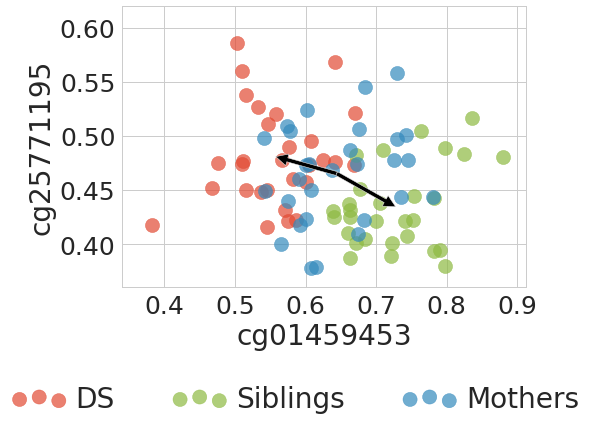

In [199]:
fontsize = 28
fontname = "Proxima Nova Rg"

def scater_down_syndrome(fig, ax, xu, xv, Y, gene_name_u, gene_name_v):
    labels = ['DS', 'Siblings', 'Mothers']
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    ax.set_prop_cycle('color', [colors[0], colors[5], colors[1]])

    for c in [0, 1, 2]:
        ax.scatter(xu[Y == c], xv[Y == c], 200, label = labels[c], alpha=0.7)
    
    #for j in range(len(xu)):
    #    ax.text(xu[j], xv[j], str(j), horizontalalignment='center', verticalalignment='center', fontsize = 15)

    l = fig.legend(framealpha=0.9, fontsize=fontsize, loc=3, # bbox_to_anchor=(0., 1.02, 1., .102), 
           ncol=3, mode="expand", borderaxespad=0., handletextpad=0.3, scatterpoints=3)    
    plt.setp(l.texts, family=fontname)

    
    mean_p = []
    for c in [0, 1, 2]:
        mean_p.append([xu[Y == c].mean(), xv[Y == c].mean()])
    for c in [0, 1]:
        #plt.arrow(mean_p[2][0], mean_p[2][1], mean_p[c][0] - mean_p[2][0], mean_p[c][1] - mean_p[2][1], color = 'k')
        ax.annotate("", xy=(mean_p[c][0], mean_p[c][1]), xycoords='data', xytext=(mean_p[2][0], mean_p[2][1]),  textcoords='data', arrowprops=dict(shrink = 4,facecolor='black'), fontsize=20)

    #k = (mean_p[0][1] - mean_p[2][1]) / (mean_p[0][0] - mean_p[2][0])
    #if abs(k) > k_thr or abs(k) < 1.0 / k_thr:
    #    continue
    #s = "k = {:0.2e}".format(k)
    #plt.text(0.17, 0.95, s, horizontalalignment='center', verticalalignment='center', transform = ax.transAxes, fontsize = 50)

    ax.set_xlabel(gene_name_u, fontsize=fontsize, fontname = fontname)
    ax.set_ylabel(gene_name_v, fontsize=fontsize, fontname = fontname)
    fig.subplots_adjust(bottom=0.3, top=0.95, left=0.2, right=0.9)
    plt.xticks(fontsize=25, fontname=fontname)
    plt.yticks(fontsize=25, fontname=fontname)   
    

def genes_pair_plot(X, y, vertices, edges, genes_names):
    #edges = np.concatenate((edges, np.array([edges[:, 1], edges[:, 0]]).T))
    
    import seaborn
    #seaborn.set_style('darkgrid', {'legend.frameon':True})
    seaborn.set_style('whitegrid')
    
    config.params["id_pair"] = param(value_be = 0, value_en = len(edges) - 1, num_ticks = len(edges), name = 'id_pair', manual_ticks = True)
    y = y.flatten()
    pu = -1
    k_thr = 3
    
    for i, e in enumerate(edges):
        config.params["id_pair"].set_tick(i)
        fig = plt.figure(figsize=(8, 6))
        ax = plt.gca()
        #fig.set_visible(not fig.get_visible())
        
        
        u = vertices[e[0]]
        v = vertices[e[1]]
        print u, v, genes_names[u], genes_names[v]
        xu = X[:, u]
        xv = X[:, v]
        
        #xu = (xu - xu.mean()) / xu.std()
        #xv = (xv - xv.mean()) / xv.std()
        
        #mothers_mask = config.params["mothers_mask"].value
        #mongoloids_mask = config.params["mongoloids_mask"].value
        data = np.array([xu, xv]).astype('float32').T
        print data.shape
        
        scater_down_syndrome(fig, ax, xu, xv, y, genes_names[u], genes_names[v])
        #plt.ylim([0, 0.06])
        #pair_genes_path = config.ofname([["kdes", genes_names[u], genes_names[v]]], ext = ".png", include_set = config.params_sets["kdes"])
        #print pair_genes_path
        
        file_name = "\\\\buddha\\In\\" + "cpgs_" + genes_names[u] + "_" + genes_names[v]
        plt.savefig(file_name + ".svg")
        plt.savefig(file_name + ".png")
        break
        #plt.close(fig)

vertices = [cpgname("cg05365729"), cpgname("cg04452713"), cpgname("cg01459453"), cpgname("cg25771195")] #cg25809905 cg09809672 cg26372517
edges = [[2, 3], [0, 1]]
genes_pair_plot(X, y, vertices, edges, cpgs_names)

NameError: name 'pair_genes_path' is not defined

In [35]:
data = cur[:, j].reshape(-1, 1)
num_groups = 5
bins = np.array(np.percentile(data, np.linspace(0, 100, num_groups + 1)))
print data.min(), data.max()
classes = np.minimum(np.digitize(data, bins), num_groups) - 1
classes = classes.flatten()
print feature.shape, classes.shape
print classes == 0
feature[classes == 0]

-1.7247499 1.4657556
(25L,) (25L,)
[False False False  True False False False False False False  True False  True False  True  True
 False False False False False False False False False]


array([ 0,  0,  1,  0,  0])

In [76]:
from configurations.config_down_GSE52588 import config
regressions_path = config.ofname([["down_phenotypes"], ["regressions_fit"]], ext = ".png", 
                                 include_set = config.params_sets["down_phenotypes"])
print regressions_path

F:\PC\UNN\Scientific\Gerontology\data\GSE52588\params\num_genes_15024\down_phenotypes\regressions_fit.png


In [36]:
print u.shape, v.shape, ids.shape
print ids
print p.shape
print p
print p.flatten()[ids]

(29L, 1L) (29L,) (29L, 1L)
[[ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]]
(29L,)
[0.24 -0.16 -0.68 -0.31 1.12 0.21 1.22 0.97 0.47 0.67 -0.09 1.23 0.35 0.99 1.52 -0.00 0.44 0.82 0.92
 2.47 -0.19 1.27 0.48 1.17 0.82 1.28 0.07 0.23 0.49]
[[0.24]
 [0.24]
 [0.24]
 [0.24]
 [0.24]
 [0.24]
 [0.24]
 [0.24]
 [0.24]
 [0.24]
 [0.24]
 [0.24]
 [0.24]
 [0.24]
 [0.24]
 [0.24]
 [0.24]
 [0.24]
 [0.24]
 [0.24]
 [0.24]
 [0.24]
 [0.24]
 [0.24]
 [0.24]
 [0.24]
 [0.24]
 [0.24]
 [0.24]]


In [67]:
input_feature_assessment(cur[:, ids[:1]], feature, clf)
input_feature_assessment(cur[:, ids[:2]], feature, clf)

(28L, 1L) (28L,)
(28L, 2L) (28L,)


2.5357142857142856

In [29]:
"{:2d}".format(2)

' 2'

In [113]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [44]:
from sklearn import svm, datasets
from scipy import stats
from sklearn import neighbors, ensemble
from sklearn.model_selection import cross_val_score

data = np.array(X)
data = data[:29, :]
print data.shape
#data = data[:29].values
data = stats.zscore(data)

np.set_printoptions(linewidth=100, formatter={'int':lambda x: "{:2d}".format(x), 'float':lambda x: "{:.2f}".format(x)})
feature_names = ["categoriaDSQIID", "fluenzaverbale","ABCiperattivita", "ABCIrritabilita", "ABCletargia", "ABCstereotipie", "ABCinappropriatespeech", "fluenzafonemica", "F.A.B."]
for feature_name in feature_names:
    print feature_name
    feature = (phenotype_df[feature_name].values)
    cur = data[~np.isnan(feature)]
    feature = feature[~np.isnan(feature)].astype('int')
    if (feature == 0).sum() < 3:
        continue
    
    print feature, 'good'
    clfs = [svm.SVC(kernel = 'rbf', C = 1, class_weight = "balanced"), 
            neighbors.KNeighborsClassifier(n_neighbors = 2),
            svm.LinearSVC(C = 1, class_weight = "balanced"),
            ensemble.RandomForestClassifier(n_estimators = 4)]

    for clf in clfs:
        score = cross_val_score(clf, cur, feature, cv=5).mean()
        clf.fit(cur, feature)
        predicted = clf.predict(cur)
        score2 = clf.score(cur, feature)
        val = float(np.bincount(feature).max()) / len(feature)
        print predicted, "{:.2f}".format(score), "{:.2f}".format(val), "{:.2f}".format(score2), type(clf).__name__
        
    #break

(29L, 15024L)
categoriaDSQIID
[ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  1  0  0  1  0  1  0  1  0  0  1  0  0  0  0] good
[ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  1  0  0  1  0  1  0  1  0  0  1  0  0  0  0] 0.76 0.79 1.00 SVC
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  1  0  0  0  0  0  0  0] 0.68 0.79 0.86 KNeighborsClassifier
[ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  1  0  0  1  0  1  0  1  0  0  1  0  0  0  0] 0.18 0.79 1.00 LinearSVC
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  1  0  1  0  1  0  0  1  0  0  0  0] 0.80 0.79 0.97 RandomForestClassifier
fluenzaverbale
[ 0  1  1  0  1  1  0  0  0  1  0  1  1  2  0  0  1  0  2  0  0  0  0  0  2] good
[ 0  1  1  0  1  1  0  0  0  1  0  1  0  2  0  0  1  0  2  0  0  0  0  0  2] 0.65 0.56 0.96 SVC
[ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  2] 0.48 0.56 0.68 KNeighborsClassifier
[ 0  1  1  0  1  1  0  0  0  1  0  1  1  2  0  0  1  0  2  0  0  0  0  0  2] 0.13 0.56 1.00 Line

In [24]:
import time
from tqdm import tqdm
for i in tqdm(range(100)):
    time.sleep(1)

100%|██████████| 100/100 [01:40<00:00,  1.00s/it]


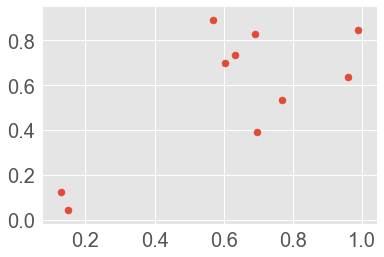

In [18]:
#py.sign_in('mike_live', 'rfHatoUPaLpzIMHQJKYK')

plt.scatter(np.random.rand(10, 1), np.random.rand(10, 1))

np.savez('tmp.npz', fig = plt.gcf())
#plot_url = py.plot_mpl(plt.gcf())

import pickle
pickle.dump(plt.gcf(), open('FigureObject.fig.pickle', 'wb'))

In [19]:
import pickle
figx = pickle.load(open('FigureObject.fig.pickle', 'rb'))

figx.show()

AttributeError: 'module' object has no attribute 'new_figure_manager_given_figure'

# Epimutations per phenotype

In [7]:
def plot_per_phenotype(x, y, label_x = '', label_y = '', title = ''):
    plt.figure(figsize=(10, 5))
    ax = plt.axes()
    ax.scatter(x, y, alpha = 0.5, linewidth = 3)
    plt.xlabel(label_x, fontsize = fontsize)
    plt.ylabel(label_y, fontsize = fontsize)
    plt.title(title, fontsize = 1.2 * fontsize)
    plt.subplots_adjust(bottom=0.2, top=0.9, left=0.2, right=0.95)
    #plt.show()
    
def plot_per_phenotypes(new_feature, path_pdf, label = '', title = ''):
    feature_names = ["categoriaDSQIID", "fluenzaverbale","ABCiperattivita", "ABCIrritabilita", "ABCletargia", "ABCstereotipie", "ABCinappropriatespeech", "fluenzafonemica", "F.A.B."]
    #feature_names = phenotype_df.columns.values
    from matplotlib.backends.backend_pdf import PdfPages
    
    with PdfPages(path_pdf) as pdf:
        for feature_name in feature_names:
            print (feature_name)
            feature = (phenotype_df[feature_name].values)
            cur = new_feature[~np.isnan(feature)]
            feature = feature[~np.isnan(feature)].astype('int')
            plot_per_phenotype(cur, feature, label_x = label, label_y = feature_name, title = title)
            pdf.savefig()
            plt.close()
            

df = pd.read_csv(config.ifname('epimutations'))
path_pdf = config.ofname([["down_epimutations"], ["epimutation", "phenotypes", "small"]], ext = ".pdf", 
                                                 include_set = config.params_sets["down_epimutations"])
plot_per_phenotypes(df["epimutations_sum"].values[:29], path_pdf, 'Number of epimutations')

categoriaDSQIID
fluenzaverbale
ABCiperattivita
ABCIrritabilita
ABCletargia
ABCstereotipie
ABCinappropriatespeech
fluenzafonemica
F.A.B.


# Age per epimutations

In [47]:
from sklearn.linear_model import LinearRegression, RidgeCV, Lasso, ElasticNet
groups = ["mongoloids_mask", "siblings_mask", "mothers_mask"]
group_masks = [0] * 3
for j, group_name in enumerate(groups):
    group_masks[j] = config.params[group_name].value

def plot_per_feature(x, y, group_masks, label_x = '', label_y = '', title = ''):
    colors = ['r', 'g', 'b']
    plt.figure(figsize=(10, 8))
    ax = plt.axes()
    for j, mask in enumerate(group_masks):
        cx = np.log(x[mask])
        cy = y[mask]#.reshape(-1, 1)
        print(cx.shape, cy.shape)
        cy = cy[~np.isnan(cx)]
        cx = cx[~np.isnan(cx)]
        
        cy = cy.reshape(-1, 1)
        ax.scatter(cy, np.exp(cx), c = colors[j], alpha = 0.5, linewidth = 3)
        model = LinearRegression().fit(cy, cx)
        r_sq = model.score(cy, cx)
        print(model.coef_)
        ax.plot(cy, np.exp(model.predict(cy)), c = colors[j])
        title += ' (' +  "{:0.3f}".format(r_sq) + ')'
    
    plt.yscale('log')
    plt.xlabel(label_y, fontsize = fontsize)
    plt.ylabel(label_x, fontsize = fontsize)
    plt.title(title, fontsize = 1.2 * fontsize)
    plt.legend(["Down", "Siblings", "Mothers"])
    plt.subplots_adjust(bottom=0.2, top=0.9, left=0.2, right=0.95)
    #plt.show()            

df = pd.read_csv(config.ifname('epimutations'))
patients_info = pd.read_csv(config.ifname("patients_info"), delimiter='\t')
age = patients_info["age"].values
epimutations_sum = df["epimutations_sum"].values
path_epimutations_age = config.ofname([["down_epimutations"], ["epimutation", "age"]], ext = ".pdf", 
                                                 include_set = config.params_sets["down_epimutations"])
epimutations_sum = epimutations_sum.astype('float')
#epimutations_sum[epimutations_sum > 5000] = np.NaN
plot_per_feature(epimutations_sum, age, group_masks, 'Number of epimutations', 'Age')
plt.savefig(path_epimutations_age)
plt.close()

(29,) (29,)
[0.01427872]
(29,) (29,)
[-0.02116727]
(29,) (29,)
[0.01855536]


# Parenclitic distributions

In [73]:
groups = ["mongoloids_mask", "siblings_mask", "mothers_mask", "random_mask"]
config.params["random_mask"] = param(np.arange(29 * 3, 29 * 4), name = 'random_mask')
group_masks = [0] * 4
for j, group_name in enumerate(groups):
    group_masks[j] = config.params[group_name].value
Y = np.concatenate([y, np.ones((29, )) * 3])
print(group_masks)
print(Y)
print(len(Y))

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]), array([29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45,
       46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57]), array([58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74,
       75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86]), array([ 87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99,
       100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115])]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
116


In [74]:
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF
from matplotlib import gridspec
#plt.boxplot([epimutations[y == 0], epimutations[y == 1], epimutations[y == 2]])
def plot_parenclitic(parenclitic, groups, y, title, x_label, is_xlog, is_ylog, is_cdf, is_kde):
    colors = ['r', 'g', 'b', 'm']
    fig = plt.figure(figsize=(10, 5))
    
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 

    ax0 = plt.subplot(gs[0])
    ax1 = plt.subplot(gs[1], sharex = ax0)
    
    yy = [[],[],[],[]]
    xx = [0] * 4
    zeros = [0] * 4
    for j in range(len(groups)):
        #print(groups[j])
        #mn = [print("{:0.2g}".format(np.min(w[w > 1e-7])), end=' ') for w in parenclitic[y == j].values]
        #print()
        #print(mn)
        x = parenclitic[y == j].values
        
        if len(x.shape) > 1:
            x = np.concatenate(x)
        
        is_small = x.std() < 1e-9
        #plt.hist(x, bins  = 100, color = colors[j], alpha = 0.5, histtype = 'step')
        zero_mask = (x < 0)
        zeros[j] = zero_mask.sum()
        x = x[~zero_mask]
        xx[j] = x
        #if j == 0:
        #    continue
        #x = x / xx[0]
        #x = x[~np.isnan(x) & ~np.isinf(x)]
        xx[j] = x
        mn = np.min(x)
        mx = np.max(x)
        if is_cdf:
            numbins = 100
        else:
            numbins = 30
                
        if is_xlog:
            bins = np.logspace(np.log10(mn), np.log10(mx), numbins)
            x = x[x > 0]
        else:
            bins = np.linspace(mn, mx, numbins)
            
            
        if is_cdf:
            ecdf = ECDF(x)
            ax0.plot(bins, ecdf(bins), c = colors[j])
        elif is_kde:
            x = x[~np.isnan(x) & ~np.isinf(x)]
            if j < 3 and not is_small and len(np.unique(x)) > 1:
                if is_xlog:
                    kde = stats.gaussian_kde(np.log10(x))
                    kde_y = kde(np.log10(bins))
                else:
                    kde = stats.gaussian_kde(x)
                    kde_y = kde(bins)
                ax0.plot(bins, kde_y, colors[j], alpha = 0.5, linewidth = 3)
            else:
                ax0.plot([bins[0], bins[0]], [0, 0], colors[j], alpha = 0.5, linewidth = 3)
            #my = max(kde_y)
            #dy = my * 0.025
            #yy = -np.random.rand(x.shape[0]) * dy * 0.8 - 2.5 * dy * j - dy
            yy[j] = np.random.rand(x.shape[0]) * 0.8 + 2.5 * j
            ax1.scatter(x, yy[j], c = colors[j], alpha = 0.5, s = 30)
        else:
            if not is_small:
                cnt, xx = np.histogram(x, bins = bins)
                ax0.plot(xx[:-1], cnt, c = colors[j])
        
    #ax0.plot([1, 1], ax0.get_ylim(), 'r')
    #ax1.plot([1, 1], [0, 3], 'r')
    cnt_change = [0, 0, 0]
    eps = 0 #np.concatenate(xx).ptp() / 100
    '''
    for i in range(len(xx[0])):
        ax1.plot([xx[0][i], xx[1][i]], [yy[0][i], yy[1][i]])
        if xx[0][i] - xx[1][i] > eps:
            cnt_change[0] += 1
        elif xx[0][i] - xx[1][i] < -eps:
            cnt_change[2] += 1
        else:
            cnt_change[1] += 1
        #ax1.plot([xx[2][i], xx[1][i]], [yy[2][i], yy[1][i]])
        #ax1.plot([xx[2][i], xx[0][i]], [yy[2][i], yy[0][i]])
    '''
    #plt.xlim(left = 0)
    
    #ax0.ticklabel_format(scilimits = [-2, 2])
    ax1.ticklabel_format(scilimits = [-2, 2])
    if is_xlog:
        ax0.set_xscale('log')
    else:
        ax0.ticklabel_format(scilimits = [-2, 2], axis = 'x')
    
    if is_ylog:
        ax0.set_yscale('log')
    else:
        ax0.ticklabel_format(scilimits = [-2, 2], axis = 'y')
    ax0.legend(["Down", # + " (Zeros = " + str(zeros[0]) + ")", \
                "Siblings", # + " (Zeros = " + str(zeros[1]) + ")", \
                "Mothers", # + " (Zeros = " + str(zeros[2]) + ")", \
                "Random SVC", # + " (Zeros = " + str(zeros[3]) + ")", \
               ], fontsize = 0.5 * fontsize)
    
    plt.setp(ax0.get_xticklabels(), visible=False)
    plt.setp(ax1.get_yticklabels(), visible=False)
    
    ax1.grid(True, axis = 'x')
    ax1.grid(False, axis = 'y')

    # Hide axes ticks
    #ax1.set_yticks([])
    
    ax1.set_xlabel(x_label, fontsize = fontsize)
    ax0.set_ylabel('${\\bf PDF}$', fontsize = fontsize)
    ax0.set_title(title, fontsize = 1.2 * fontsize)  #  + " " + str(cnt_change)
    plt.subplots_adjust(bottom=0.2, top=0.9, left=0.2, right=0.95, hspace=.02)
    #plt.show()

In [75]:
is_ylog = False
is_xlog = True
is_cdf = False
is_kde = True
parenclitic_pairs_path = config.ofname([["parenclitic_distributions", # _inside
                                        "xlog" if is_xlog else "", \
                                        "ylog" if is_ylog else "", \
                                        "cdf" if is_cdf else "",
                                        "kde" if is_kde else ""]], ext = ".pdf", \
                                     include_set = config.params_sets["parenclitic_boxplots"])
print(parenclitic_pairs_path)
with PdfPages(parenclitic_pairs_path) as pdf:
    for i in parenclitics:
        print(parenclitic_names[i])
        if np.std(parenclitics[i]) < 1e-8:
            continue
        plot_parenclitic(parenclitics[i], groups, Y, parenclitic_names[i], parenclitic_names[i], is_xlog, is_ylog, is_cdf, is_kde)
        pdf.savefig(dpi = 300)
        plt.close()

D:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_genes_14756\kde_mask_siblings_mask\algorithm_pdf\thr_type_best\parenclitic_distributions_xlog___kde.pdf
Zeros betweenness


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log10
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\function_base.py:159: RuntimeWarning: invalid value encountered in multiply
  y *= step
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\function_base.py:168: RuntimeWarning: invalid value encountered in add
  y += start


Max betweenness
Min betweenness


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\function_base.py:142: RuntimeWarning: invalid value encountered in double_scalars
  delta = stop - start


Mean betweenness
Std betweenness
Zeros pagerank
Max pagerank
Min pagerank
Mean pagerank
Std pagerank
Zeros closeness
Max closeness
Min closeness
Mean closeness
Std closeness
Zeros eigenvector centrality
Max eigenvector centrality
Min eigenvector centrality
Mean eigenvector centrality
Std eigenvector centrality
Zeros degrees
Max degrees
Min degrees
Mean degrees
Std degrees
Number of edges
Number of nodes
Max component size
Max component size norm nodes
Max component size norm edges
Efficiency
Robustness


In [40]:
parenclitic = parenclitics[0]
len(parenclitic[0])
#len(np.concatenate(parenclitic[y == 0].values))

TypeError: object of type 'numpy.int64' has no len()

In [66]:
len(parenclitics)

87

In [9]:
groups = ["mongoloids_mask", "siblings_mask", "mothers_mask"]
group_masks = [0] * 3
for j, group_name in enumerate(groups):
    group_masks[j] = config.params[group_name].value


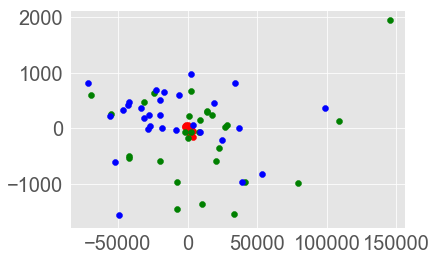

In [10]:
# get DS parenclitics only
real_data_mask = range(29 * 3)
data = parenclitics.values[real_data_mask]

from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(data)  
Xt = pca.transform(data)

colors = ['red', 'green', 'blue']

for j in range(3):
    plt.scatter(Xt[group_masks[j], 2], Xt[group_masks[j], 5], c = colors[j])

In [11]:
from sklearn.base import ClassifierMixin
from sklearn.utils.testing import all_estimators
classifiers=[est for est in all_estimators() if issubclass(est[1], ClassifierMixin)]
#print(classifiers)

clfs = [svm.SVC(kernel = 'rbf', C = 1, class_weight = "balanced", gamma = 'auto'), 
            neighbors.KNeighborsClassifier(n_neighbors = 2),
            svm.LinearSVC(C = 1, class_weight = "balanced"),
            ensemble.RandomForestClassifier(n_estimators = 4)]
Y = (y > 0).astype('uint8')
for clf in classifiers:
    clf = clf[1]()
    try:
        score = cross_val_score(clf, data, Y, cv=5).mean()
        clf.fit(data, Y)
        predicted = clf.predict(data)
        score2 = clf.score(data, Y)
        val = float(np.bincount(Y).max()) / len(Y)
        print (predicted, "{:.2f}".format(score), "{:.2f}".format(val), "{:.2f}".format(score2), type(clf).__name__)
    except:
        pass

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1] 1.00 0.67 1.00 AdaBoostClassifier
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1] 1.00 0.67 1.00 BaggingClassifier
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1] 1.00 0.67 1.00 BernoulliNB
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1] 1.00 0.67 1.00 CalibratedClassifierCV
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-pack

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1] 1.00 0.67 1.00 GradientBoostingClassifier
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1] 0.99 0.67 0.99 KNeighborsClassifier
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1] 0.33 0.67 1.00 LabelPropagation
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1] 0.33 0.67 1.00 LabelSpreading
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\semi_supervised\label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\semi_supervised\label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\semi_supervised\label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\semi_supervised\label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\semi_supervised\label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\semi_supervised\label_propagation.py:205: Runtime

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1] 1.00 0.67 1.00 LogisticRegressionCV
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0] 0.81 0.67 0.33 MLPClassifier
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1] 1.00 0.67 1.00 MultinomialNB
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1
 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 0 1 0 1 1 1 1] 0.85 0.67 0.85 NearestCentroid
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1] 1.00 0.67 1.00 RidgeClassifier
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1] 0.75 0.67 1.00 RidgeClassifierCV
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1] 1.00 0.67 1.00 SGDClassifier
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1] 0.67 0.67 1.00 SVC


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.239407e-17
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.709358e-17
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter a

In [22]:
parenclitics

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,5784,1.919681e+07,0,4793.972825,240661.980998,0,0.031190,0.000012,0.000068,0.000481,...,0,30.865140,193.585539,227723,14756,11649,0.789442,0.051154,0.348444,1733
1,6794,3.178820e+07,0,5218.149024,311968.162671,0,0.052891,0.000012,0.000068,0.000661,...,0,23.456899,194.776024,173065,14756,12369,0.838235,0.071470,0.396730,1451
2,3145,3.008115e+07,0,6449.089184,271046.371279,0,0.022461,0.000011,0.000068,0.000252,...,0,178.899837,463.849655,1319923,14756,13866,0.939686,0.010505,0.505752,3366
3,7103,2.819635e+07,0,4711.488411,324698.997066,0,0.063424,0.000012,0.000068,0.000809,...,0,14.067362,149.268327,103789,14756,11618,0.787341,0.111939,0.346997,1053
4,5103,2.206385e+07,0,4751.740241,214261.707832,0,0.025997,0.000013,0.000068,0.000349,...,0,47.044728,208.237730,347096,14756,11432,0.774736,0.032936,0.332817,2112
5,6709,3.081925e+07,0,4355.848333,274532.883561,0,0.063441,0.000013,0.000068,0.000724,...,0,13.148008,133.300700,97006,14756,10861,0.736040,0.111962,0.297630,995
6,9373,4.384667e+07,0,6580.887436,511810.575646,0,0.106310,0.000011,0.000068,0.001298,...,0,10.064381,173.156916,74255,14756,13935,0.944362,0.187664,0.499722,836
7,7470,2.090158e+07,0,4203.179385,208935.551557,0,0.051416,0.000014,0.000068,0.000680,...,0,12.307943,125.001291,90808,14756,10302,0.698157,0.113448,0.260771,940
8,8761,5.882291e+07,0,5273.566481,493581.508209,0,0.121513,0.000012,0.000068,0.001141,...,0,9.539848,133.331617,70385,14756,12463,0.844606,0.177069,0.401404,909
9,3652,2.520365e+07,0,5984.770670,344248.997834,0,0.079699,0.000011,0.000068,0.001264,...,0,10.989157,213.964344,81078,14756,13279,0.899905,0.163781,0.456437,514


In [33]:
parenclitic_names

['Betweenness', 'Pagerank', 'Closeness', 'Eigenvector centrality', 'Degrees']

In [34]:
parenclitic_names = parenclitic_feature_names()

In [37]:
print(parenclitic_names.values())

dict_values(['Degrees', 'Min degrees', 'Max degrees', 'Mean degrees', 'Std degrees', 'Zeros degrees', 'Efficiency', 'Betweenness', 'Min betweenness', 'Max betweenness', 'Mean betweenness', 'Std betweenness', 'Zeros betweenness', 'Closeness', 'Min closeness', 'Max closeness', 'Mean closeness', 'Std closeness', 'Zeros closeness', 'Pagerank', 'Min pagerank', 'Max pagerank', 'Mean pagerank', 'Std pagerank', 'Zeros pagerank', 'Eigenvalues', 'Eigenvector centrality', 'Min eigenvector centrality', 'Max eigenvector centrality', 'Mean eigenvector centrality', 'Std eigenvector centrality', 'Zeros eigenvector centrality', 'Number of edges', 'Number of nodes', 'Max component size', 'Max component size norm nodes', 'Max component size norm edges', 'Eigenvalues intervals', 'Eigenvalues intervals normalized', 'IPR', 'Max IPR', 'Mean IPR', 'Weights', 'Sum weights', 'Min weights', 'Max weights', 'Mean weights', 'Std weights', 'Zeros weights', 'Community edge betweenness: optimal count', 'Component size

# Centrality sort

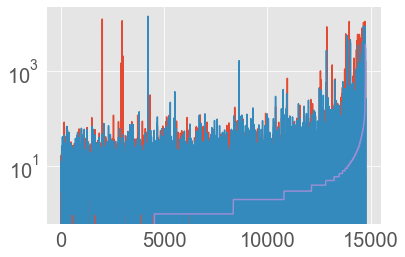

In [97]:
i = 3
degrees_d = parenclitics[4][0 + i]
degrees_s = parenclitics[4][29 + i]
degrees_m = parenclitics[4][29 * 2 + i]
ids = np.argsort(degrees_d)
degrees_d = degrees_d[ids]
degrees_s = degrees_s[ids]
degrees_m = degrees_m[ids]
plt.plot(degrees_m)
plt.plot(degrees_s)
plt.plot(degrees_d)
plt.yscale('log')